In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
%matplotlib inline

### 1. Single Perceptron

In [2]:
num_dataset = np.array([[0.26, 0.34, 0] , [0.11, 0.25, 0], [0.15, 0.30, 0], [0.79,0.19,1], [0.90,0.14,1]])

In [3]:
features = num_dataset[:, :2]
labels = num_dataset[:, 2].reshape(num_dataset.shape[0], 1)

#print(features)
#print(labels)

Text(0.5,1,'Input Data')

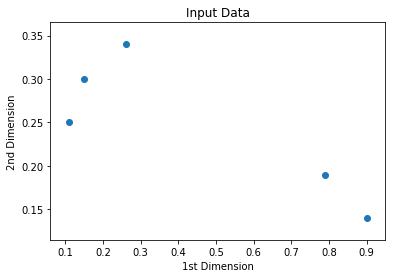

In [4]:
plt.scatter(features[:, 0], features[:, 1])
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title('Input Data')

In [5]:
dimension1_min, dimension2_min, dimension1_max, dimension2_max = 0,0,1,1
num_output = labels.shape[1]
dimension1 = [dimension1_min, dimension1_max]
dimension2 = [dimension2_min, dimension2_max]

In [6]:
perceptron = nl.net.newp([dimension1, dimension2], num_output)

The goal of learning is reached


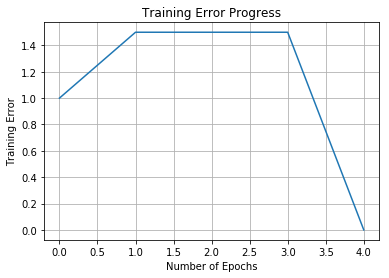

In [7]:
err_progress = perceptron.train(features, labels, epochs=100, show=20,lr=0.03)
plt.plot(err_progress)
plt.xlabel('Number of Epochs')
plt.ylabel('Training Error')
plt.title('Training Error Progress')
plt.grid()

In [8]:
perceptron.sim([[0.81, 0.23]])

array([[1.]])

### 2. Single Layer Neural Network

In [9]:
data = np.loadtxt('data_nn.txt')
features = data[:, 0:2]
labels = data[:, 2:]

data

array([[1. , 4. , 0. , 0. ],
       [1.1, 3.9, 0. , 0. ],
       [1.2, 4.1, 0. , 0. ],
       [0.9, 3.7, 0. , 0. ],
       [7. , 4. , 0. , 1. ],
       [7.2, 4.1, 0. , 1. ],
       [6.9, 3.9, 0. , 1. ],
       [7.1, 4.2, 0. , 1. ],
       [4. , 1. , 1. , 0. ],
       [4.1, 0.9, 1. , 0. ],
       [4.2, 1.1, 1. , 0. ],
       [3.9, 0.8, 1. , 0. ],
       [4. , 7. , 1. , 1. ],
       [4.2, 7.2, 1. , 1. ],
       [3.9, 7.1, 1. , 1. ],
       [4.1, 6.8, 1. , 1. ]])

In [10]:
features

array([[1. , 4. ],
       [1.1, 3.9],
       [1.2, 4.1],
       [0.9, 3.7],
       [7. , 4. ],
       [7.2, 4.1],
       [6.9, 3.9],
       [7.1, 4.2],
       [4. , 1. ],
       [4.1, 0.9],
       [4.2, 1.1],
       [3.9, 0.8],
       [4. , 7. ],
       [4.2, 7.2],
       [3.9, 7.1],
       [4.1, 6.8]])

In [11]:
labels

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

Text(0.5,1,'Input Data')

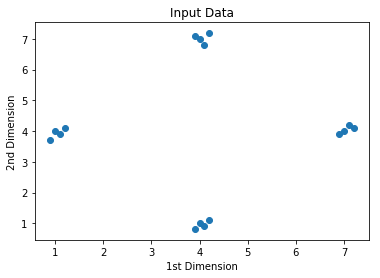

In [12]:
plt.scatter(features[:,0], features[:,1])
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title('Input Data')

### 2. Single Layer Neural Network

In [13]:
dim1_min, dim2_min, dim1_max, dim2_max = features[:,0].min(), features[:,1].min(), features[:,0].max(), features[:,1].max()
num_output = labels.shape[1]
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
single_nn = nl.net.newp([dim1, dim2], num_output)

In [14]:
err_progress = single_nn.train(features, labels, epochs=100, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


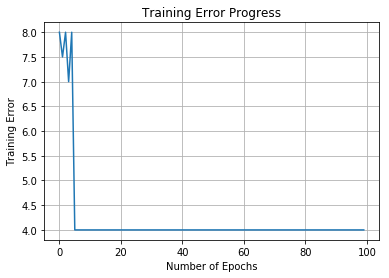

In [15]:
plt.plot(err_progress)
plt.xlabel('Number of Epochs')
plt.ylabel('Training Error')
plt.title('Training Error Progress')
plt.grid()

In [16]:
print('Test Data')
test_data = [[0.1, 4.5], [5.6, 0.4], [10, 7]]
for i in test_data:
    print(i, '=>', single_nn.sim([i])[0])

Test Data
([0.1, 4.5], '=>', array([0., 0.]))
([5.6, 0.4], '=>', array([1., 0.]))
([10, 7], '=>', array([1., 1.]))


### 3. Multi Layer Neural Network

In [17]:
min_val = -30
max_val = 30
num_points = 150

x = np.linspace(min_val, max_val, num_points)
y = 3*np.square(x) + 5 # inputs
y /= np.linalg.norm(y) # pre-processing

Text(0.5,1,'Input Data')

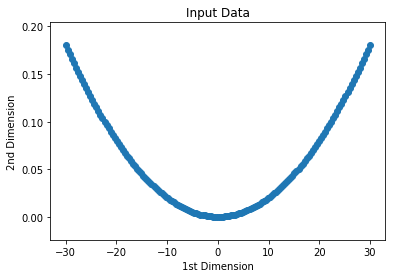

In [18]:
features = x.reshape(num_points,1)
labels = y.reshape(num_points,1)

plt.scatter(features,labels)
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title('Input Data')

In [19]:
ml_nn = nl.net.newff([[min_val, max_val]], [10,4,1])
ml_nn.trainf = nl.train.train_gd # training with gradient descent and backprop
err_progress = ml_nn.train(features, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 2.15517086637;
Epoch: 200; Error: 0.0197886878027;
The goal of learning is reached


Text(0.5,1,'Actual vs. Predicted')

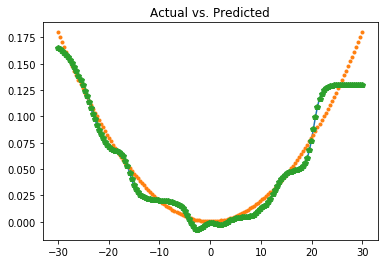

In [20]:
output = ml_nn.sim(features)

y_prediction = output.reshape(num_points)
x_dense = np.linspace(min_val, max_val, num_points*2)
y_dense_prediction = ml_nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.plot(x_dense, y_dense_prediction, '-', x, y, '.', x, y_prediction, 'p')
plt.title('Actual vs. Predicted')

### 4. Recurrent Neural Network

In [21]:
def get_data(num_points):
    wave_one = 0.6 * np.sin(np.arange(0, num_points))
    wave_two = 3.5 * np.sin(np.arange(0, num_points))
    wave_three = 1.2 * np.sin(np.arange(0, num_points))
    wave_four = 4.6 * np.sin(np.arange(0, num_points))
    
    amplitude_one = np.ones(num_points)
    amplitude_two = 2.2 + np.zeros(num_points)
    amplitude_three = 3.1 * np.ones(num_points)
    amplitude_four = 0.9 * np.zeros(num_points)
    
    wave = np.array([wave_one, wave_two, wave_three, wave_four]).reshape(num_points*4,1)
    amplitude = np.array([amplitude_one, amplitude_two, amplitude_three, amplitude_four]).reshape(num_points*4,1)
    
    return wave, amplitude

def visualize_output(nn, num_points_test):
    wave, amplitude = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amplitude.reshape(num_points_test*4))
    plt.plot(output.reshape(num_points_test*4))

if __name__ == '__main__':
    num_points = 50
    wave, amplitude = get_data(num_points)
    #print wave
    #print amplitude
    

In [22]:
nn = nl.net.newelm([[-2,2]], [10,1], [nl.trans.TanSig(), nl.trans.PureLin()])

In [23]:
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.init()

Epoch: 100; Error: 0.605538646823;
Epoch: 200; Error: 0.0887698354754;
Epoch: 300; Error: 0.0630334881811;
Epoch: 400; Error: 0.0578594067308;
Epoch: 500; Error: 0.0535427732829;
Epoch: 600; Error: 0.0534453998593;
Epoch: 700; Error: 0.0473501953151;
Epoch: 800; Error: 0.0429349007668;
Epoch: 900; Error: 0.0381031240665;
Epoch: 1000; Error: 0.0333807561966;
Epoch: 1100; Error: 0.0305038357951;
Epoch: 1200; Error: 0.0314304621911;
The maximum number of train epochs is reached


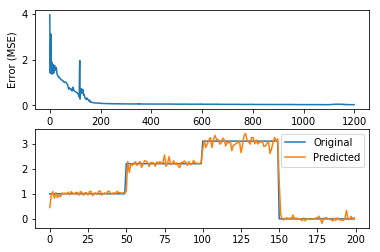

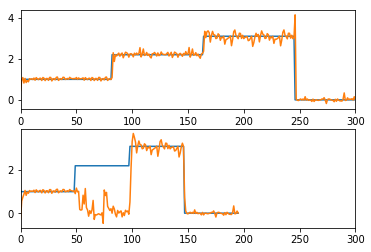

In [24]:
err_progress = nn.train(wave, amplitude, epochs=1200, show=100, goal=0.01)

output = nn.sim(wave)

plt.subplot(211)
plt.plot(err_progress)
plt.xlabel('#Epochs')
plt.ylabel('Error (MSE)')

plt.subplot(212)
plt.plot(amplitude.reshape(num_points*4))
plt.plot(output.reshape(num_points*4))
plt.legend(['Original', 'Predicted'])

plt.figure()
plt.subplot(211)
visualize_output(nn, 82)
plt.xlim([0, 300])

plt.subplot(212)
visualize_output(nn, 49)
plt.xlim([0, 300])
plt.show()

### 5. Optical Character Recognition

In [2]:
import numpy as np
import os
import sys
import cv2

input = 'letter.data'

In [ ]:
image_factor = 12
start, end = 6, -1
height, width = 16, 8

with open(input, 'r') as input_data:
    for line in input_data.readlines():
        data = np.array([255 * float(x) for x in line.split('\t')[start:end]])
        image = np.reshape(data, (height, width))
        image_scaled = cv2.resize(image, None, fx=image_factor, fy=image_factor)
        print(line)
        cv2.imshow("Image", image_scaled)
        
        c = cv2.waitKey()
        if c == 27:
            break

1	o	2	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	1	1	0	0	0	0	0	1	1	1	1	1	0	0	0	1	0	0	0	1	1	0	1	1	0	0	0	0	1	1	1	0	0	0	0	0	0	1	1	0	0	0	0	0	0	1	1	0	0	0	0	0	0	1	1	0	0	0	0	0	1	1	1	0	0	0	1	1	1	0	1	1	1	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	

2	m	3	1	2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	1	1	1	1	1	0	1	1	0	1	1	0	1	1	1	0	1	1	0	0	0	1	1	0	1	1	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	

3	m	4	1	3	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	1	1	0	0	1	1	0	1	0	1	0	1	1	1	0	1	0	1	1	1	0	1	0	1	0	0	1	0	0	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	

